# A. Attractor reconstruction

Data: MRI5_NVF1_10mm_1p2mmV_1

In [1]:
import os
import numpy as np

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [2]:
os.chdir('../')

In [3]:
CSV_FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
VIDEO_FILE_DIR = './data/VF_FVF_DATASETS/VIDEO/'
DATA_NAME = 'MRI5_NVF1_10mm_1p2mmV_1'
CSV_SAMPLE_SPAN = (20000, 100000)

FILTERING_CSV_METHODS = 'bandpass_filtering'
BANDPASS_FILTERING_PARAMS = {
                            'passband_edge_freq':[90, 200], 
                            'stopband_edge_freq':[20, 450], 
                            'passband_edge_max_loss':1, 
                            'stopband_edge_min_loss':10
                            }

BIFURCATION_CONVERT_PARAMS = { 
                            'parameter_sample_step': 1000,
                            'standardize': False, 
                            'mean0':True 
                            }
BIFURCATION_DISCRETIZATION_PARAMS = {
                                    'upside_down': True,
                                    'prominence': 0.1 
                                    }

## Load data

In [4]:
[mic_t_data, mic_data, flow_data] = LoadCSV(
                                            file_path=CSV_FILE_DIR+DATA_NAME+'.csv', 
                                            data_name_list=['t', 'mic', 'flow'], 
                                            sample_span=CSV_SAMPLE_SPAN
                                            )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI5_NVF1_10mm_1p2mmV_1.csv
data list | t, mic, flow


## Preprocess

In [5]:
pp = PreProcessing(
                data=mic_data,
                t_data=mic_t_data,
                video_data_list=[], 
                video_t_data_list=[]
                )
pp.filter(
            method=FILTERING_CSV_METHODS, 
            params=BANDPASS_FILTERING_PARAMS
            )

mic_data = pp.data
mic_t_data = pp.t_data

## Bifurcation convert

In [12]:
BC_mic = BifurcationConvert(
                            data=mic_data, 
                            parameter_data=flow_data, 
                            t_data=mic_t_data
                            )
BC_mic.convert(params=BIFURCATION_CONVERT_PARAMS)
BC_mic.discretization(params = { 'upside_down': False,'prominence': 0.01 })

bifurcation_parameter_mic_list = BC_mic.bifurcation_parameter_list
bifurcation_data_mic_list = BC_mic.bifurcation_data_list
bifurcation_data_mic_list_discreted = BC_mic.bifurcation_data_list_discreted

## Attractor reconstruction

In [8]:
num = 94

### Mutual information (find time delay)

In [9]:
TDE_mic = TimeDelayEmbedding(
                            data=bifurcation_data_mic_list[num], 
                            lags_num=10, 
                            bins=16
                            )
mutual_info, mutual_info_min = TDE_mic.mutual_information()
print(mutual_info_min)

0


c:\Users\rm0179rx\project\github\rhythm-lab\DDA-VFFVF\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\rm0179rx\project\github\rhythm-lab\DDA-VFFVF\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\rm0179rx\project\github\rhythm-lab\DDA-VFFVF\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\rm0179rx\project\github\rhythm-lab\DDA-VFFVF\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering m

## Figure

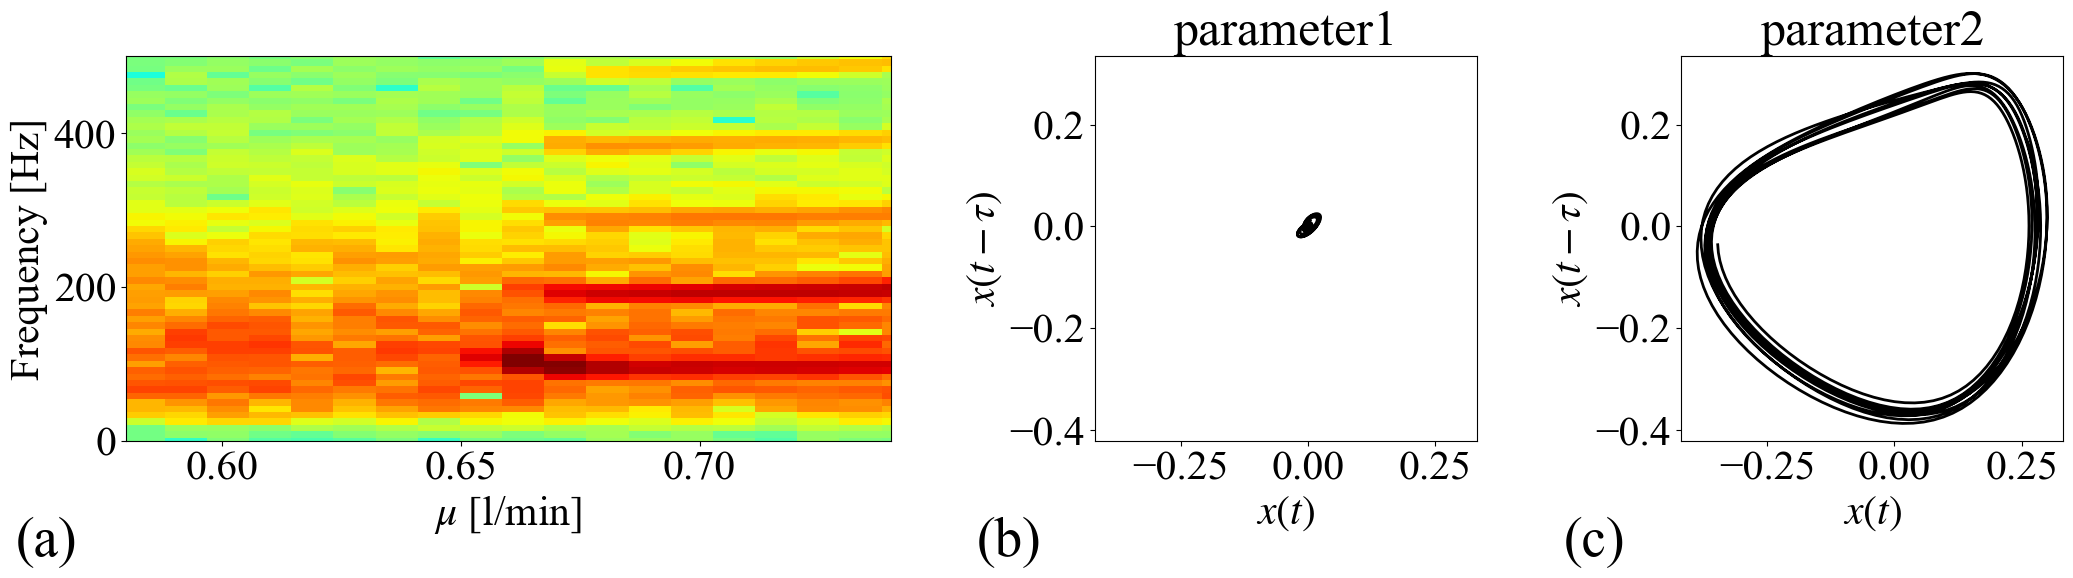

In [242]:
at1 = 0
n_shift_at1 = 14
at2 =65
n_shift_at2 = 25

fig.figure02(data=mic_data[:45000], t_data=mic_t_data[:45000],
            data_at1=bifurcation_data_mic_list[at1], n_shift_at1=n_shift_at1, n_plot_at1=5000,
            data_at2=bifurcation_data_mic_list[at2], n_shift_at2=n_shift_at2, n_plot_at2=5000,
            parameter_data=flow_data[:45000], 
            figsize=(25, 5), width_ratios=[2, 1, 1], wspace=0.4,
            xlabel=r'$\mu$'+' [l/min]', ylabel='Frequency [Hz]', nperseg=1500, cmaplim=(-220, 80), cmap='jet',  xlim=(0.58, 0.74), ylim=(0, 500), 
            title_at1='parameter1', title_at2='parameter2', linestyle_at='-', c_at='k', lw_at=2, xlabel_at=r'$x(t)$', ylabel_at=r'$x(t-\tau)$', same_lim=True,
            panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.35, 1.), (0.2, 1.), (0.2, 1)], panel_fontsize=40, 
            save_filename=None)

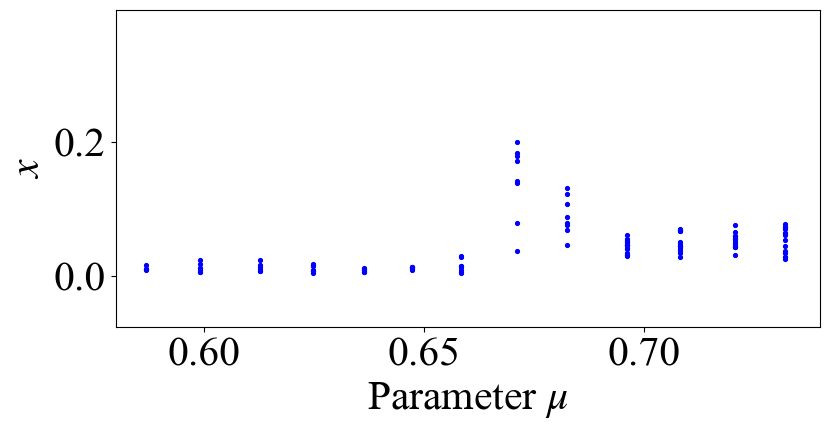

In [15]:
fig_ = Figure({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            })
fig_.plt_bifurcation_in_descrete(bifurcation_data_mic_list_discreted, bifurcation_parameter_mic_list, parameter_lim=(0.58, 0.74), s=30, figsize=(9, 5))